In [1]:
import numpy as np
import pandas as pd
from datasets.radcure import load_radcure
from sklearn.model_selection import train_test_split


path = "/u/97/nguyenq10/unix/HUS/cancer-clusters/datasets/radcure/clinical_train.csv"
x, y, cfg0 = load_radcure(path)
x_tr, x_val, y_tr, y_val = train_test_split(
    x, y, train_size=cfg0["train_size"], random_state=cfg0["seed"])

2024-02-19 12:23:31.394851: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-19 12:23:31.522343: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


x.shape=(1800, 45), y.shape=(1800, 2)


In [ ]:
model =

In [3]:
# Import necessary libraries
import os
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_probability as tfp
from copy import deepcopy
from sklearn.model_selection import ParameterGrid, train_test_split
from tensorflow.keras.callbacks import TensorBoard

# Custom module imports
from datasets.radcure import  load_radcure
from main import train
from models.losses import Losses
from models.model import GMM_Survival
from utils.eval_utils import accuracy_metric, calibration, cindex, cindex_metric
from utils.utils import ProgBar, get_latent, get_purity, get_workdir, setup_env, setup_seed
import sys

# TensorFlow Probability shortcuts
tfd = tfp.distributions
tfkl = tf.keras.layers
tfpl = tfp.layers
tfk = tf.keras

# Environment setup for reproducibility and current directory printout
setup_env()
print(os.getcwd())




# Load dataset
path = "/u/97/nguyenq10/unix/HUS/cancer-clusters/datasets/radcure/clinical1.csv"
x, y, cfg0 = load_radcure(path)

# Configuration for the dataset and model
# cfg0["latent_dim"] = 2
cfg0["num_clusters"] = 5
cfg0["epochs"] = 2000
workdir0 = "radcure/analysis"
workdir = get_workdir(workdir0, f"k{cfg0['num_clusters']}")
cfg0["workdir"] = workdir

print(cfg0)
x_tr, x_val, y_tr, y_val = train_test_split(
    x, y, train_size=cfg0["train_size"], random_state=cfg0["seed"])

# Training the model with specified configuration
print("Training main model...")
model0, history = train(x, y, config=cfg0, log=False)
clusters = model0.get_phenotypes(x, y)
print(get_purity(y, model0.get_phenotypes(x, y)))
get_latent(model0, x, y)

CWD: /m/home/home9/97/nguyenq10/unix/HUS/cancer-clusters
GPU: /physical_device:GPU:0
/m/home/home9/97/nguyenq10/unix/HUS/cancer-clusters
x.shape=(3346, 62), y.shape=(3346, 2)
{'seed': 0, 'inp_shape': 62, 'num_clusters': 5, 'latent_dim': 8, 'monte_carlo': 1, 'learn_prior': False, 'weibull_shape': 2.5, 'sample_surv': False, 'activation': 'relu', 'survival': True, 'epochs': 2000, 'layers': [50, 100], 'learning_rate': 0.001, 'train_size': 0.7, 'workdir': './runs/radcure/analysis/Feb19_12-24-26_piet_k5'}
Training main model...


Progress:  14%|█▎        | 273/2000 [00:17<01:22, 20.95it/s, loss=40.4006, val_output_5_cindex_metric=0.6664, val_output_7_purity_metric=0.0000] 

KeyboardInterrupt: 

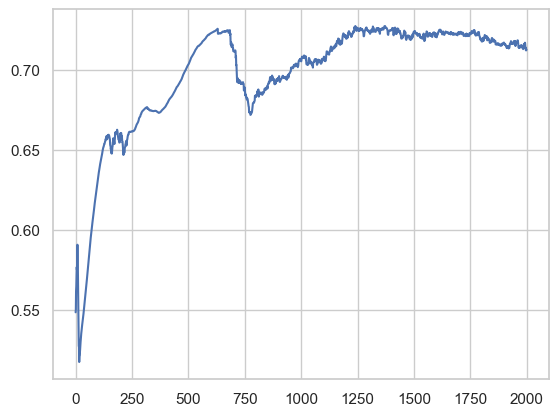

In [10]:
plt.plot(history.history["val_output_5_cindex_metric"])

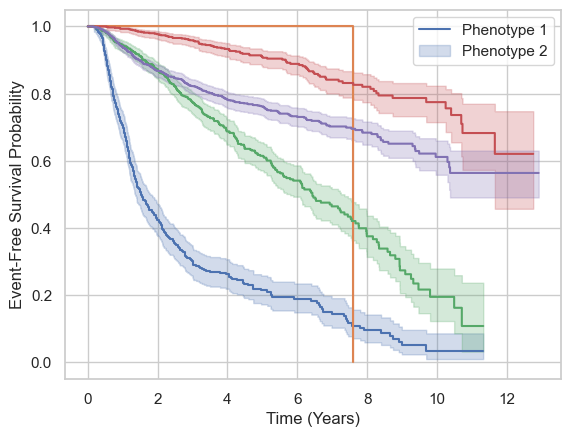

0.12475835780957427


In [11]:
print(get_purity(y, model0.get_phenotypes(x, y)))

## Consensus Matrix

In [5]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

path = "/u/97/nguyenq10/unix/HUS/cancer-clusters/datasets/radcure/k4/cm.csv"
M = pd.read_csv(path).values
# sns.heatmap(M, annot=True, cmap='coolwarm', linewidths=.5)
# plt.hist(M)



## Spectral Clustering

/u/97/nguyenq10/unix/.local/lib/python3.8/site-packages/sklearn/cluster/_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(


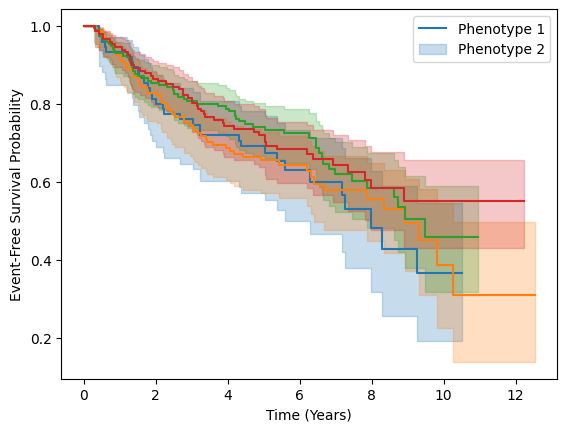

/u/97/nguyenq10/unix/myconda/.conda_envs/vadesc/lib/python3.8/site-packages/lifelines/fitters/__init__.py:204: ApproximationWarning: Approximating using linear interpolation`.

  warnings.warn("Approximating using linear interpolation`.\n", exceptions.ApproximationWarning)
/u/97/nguyenq10/unix/myconda/.conda_envs/vadesc/lib/python3.8/site-packages/lifelines/fitters/__init__.py:204: ApproximationWarning: Approximating using linear interpolation`.

  warnings.warn("Approximating using linear interpolation`.\n", exceptions.ApproximationWarning)
/u/97/nguyenq10/unix/myconda/.conda_envs/vadesc/lib/python3.8/site-packages/lifelines/fitters/__init__.py:204: ApproximationWarning: Approximating using linear interpolation`.

  warnings.warn("Approximating using linear interpolation`.\n", exceptions.ApproximationWarning)
/u/97/nguyenq10/unix/myconda/.conda_envs/vadesc/lib/python3.8/site-packages/lifelines/fitters/__init__.py:204: ApproximationWarning: Approximating using linear interpolation`.

 

Purity: 0.15328487748597988


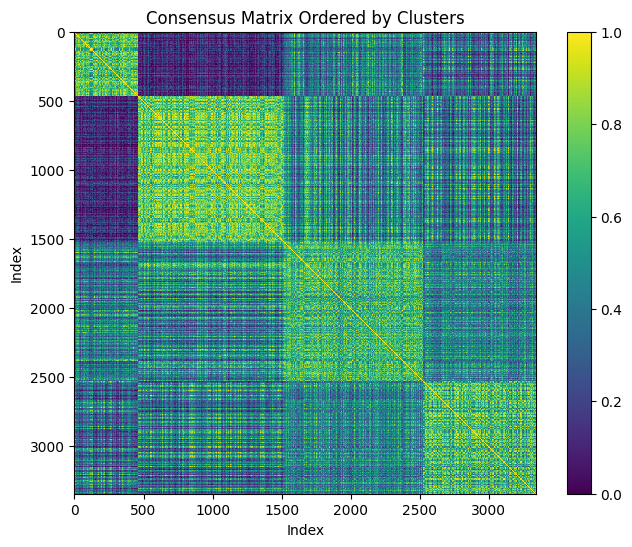

In [6]:
from sklearn.cluster import SpectralClustering
from utils.utils import get_purity

# Assuming M is your feature matrix and y_val is your ground truth labels
k = 4  # desired number of clusters

# Spectral clustering
sc = SpectralClustering(n_clusters=k, affinity='cosine', assign_labels='kmeans', random_state=42)
clusters = sc.fit_predict(M)

# Calculate purity
purity = get_purity(y_val, clusters[y_val.index])

print(f"Purity: {purity}")

# Sort M by C0
# First, get the indices that would sort C0
sorted_indices = np.argsort(clusters)

# Then, reorder M accordingly, both rows and columns since it's a matrix
M_sorted = M[sorted_indices, :][:, sorted_indices]

# Visualization
plt.figure(figsize=(8, 6))
plt.imshow(M_sorted, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Consensus Matrix Ordered by Clusters')
plt.xlabel('Index')
plt.ylabel('Index')
plt.show()

## Shapley Explain

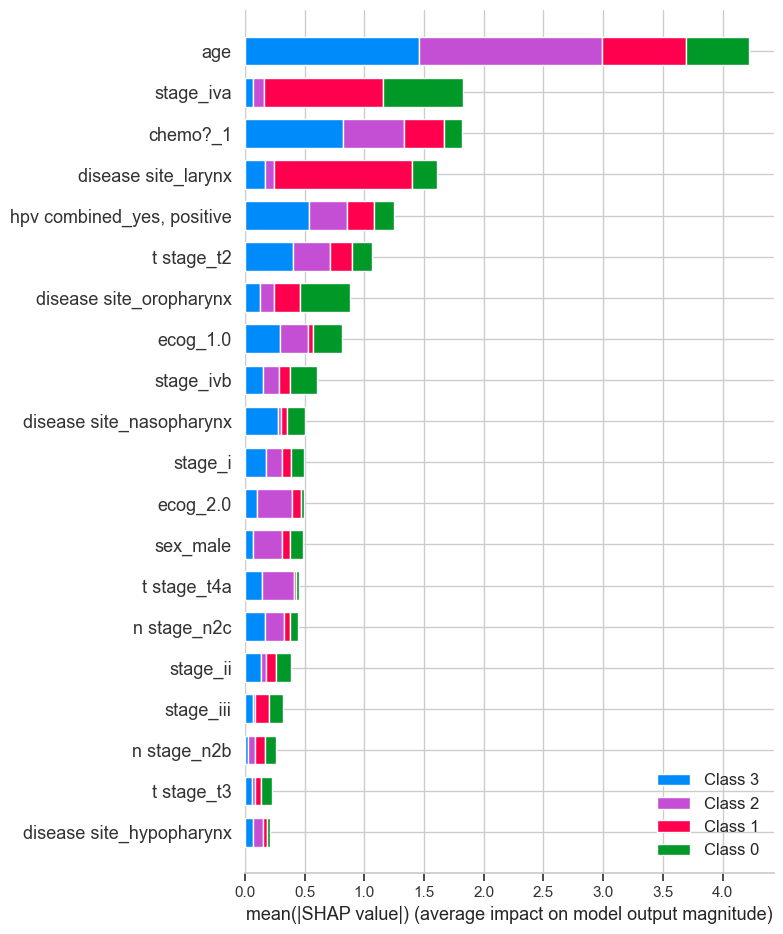

In [5]:
import numpy as np
import pandas as pd
import xgboost as xgb
import shap
from sklearn.model_selection import train_test_split

# Split features and target
X = x  # Exclude last column
c = clusters   # Last column is cluster assignment

# Train-test split
X_train, X_test, c_train, c_test = train_test_split(X, c, test_size=0.2, random_state=42)

# XGBoost training
params = {
    'n_estimators': 5000,  # Number of trees to build
    'max_depth': 6,        # Maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit.
    'learning_rate': 0.01, # Step size shrinkage used to prevent overfitting. Range is [0,1]
    'subsample': 0.5,      # Subsample ratio of the training instances. Setting it to 0.5 means that XGBoost would randomly sample half of the training data prior to growing trees. and this will prevent overfitting.
    'use_label_encoder': False
}

model = xgb.XGBClassifier(**params)
model.fit(X_train, c_train, early_stopping_rounds=200, eval_set=[(X_test, c_test)], verbose=False)

# SHAP explanations
explainer = shap.TreeExplainer(model)
shap_vals = explainer.shap_values(X_train, check_additivity=False)

# Visualize SHAP values
shap.summary_plot(shap_vals, X_train, feature_names=x.columns, plot_type="bar")

In [6]:
# import numpy as np

# # Calculate model predictions for comparison
# model_preds = np.array(model.predict(X_test, output_margin=True))
# shap_vals = np.array(explainer.shap_values(X_test, check_additivity=False))

# # Calculate the sum of SHAP values and the base value for each prediction
# shap_preds = np.array(explainer.expected_value)[:,None] + np.array(shap_vals).sum(axis=1)

# # Assert that the calculated sums are almost equal to the model predictions
# np.testing.assert_almost_equal(model_preds, shap_preds, decimal=3)
# print("Local accuracy check passed.")


In [7]:
# X_test =X_test.values
# # Select a feature index to test, e.g., 0 for the first feature
# feature_index = 0
# original_value = X_test[0, feature_index]

# # Slightly modify the feature's value
# X_test_modified = X_test.copy()
# X_test_modified[0, feature_index] = original_value * 1.1  # Increase by 10%

# # Recompute SHAP values for the modified instance
# shap_values_modified = explainer.shap_values(X_test_modified)

# # Compare SHAP values for the original and modified instances
# print("Original SHAP value for feature:", shap_vals[0, feature_index])
# print("Modified SHAP value for feature:", shap_values_modified[0, feature_index])


In [37]:
x1[x1['clusters'].isin(unique_clusters)]

,age,sex_male,disease site_hypopharynx,disease site_larynx,disease site_lip & oral cavity,disease site_nasal cavity,disease site_nasopharynx,disease site_oropharynx,disease site_paranasal sinus,disease site_salivary glands,...,stage_i,stage_ii,stage_iia,stage_iii,stage_iiia,stage_iiic,stage_iv,stage_iva,stage_ivb,clusters
0,0.397493,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0.541164,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-1.039212,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,3
3,2.239856,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,2
4,0.659480,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,0.532712,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1796,-0.684261,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1797,-0.312408,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,3
1798,-0.811029,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,3


In [41]:
category_proportions

,clusters,"hpv combined_yes, positive",proportion
0,0,0,0.561279
1,0,1,0.438721
2,1,0,0.978887
3,1,1,0.021113
4,2,0,0.914692
5,2,1,0.085308
6,3,0,0.532673
7,3,1,0.467327


In [42]:
x

,age,sex_male,disease site_hypopharynx,disease site_larynx,disease site_lip & oral cavity,disease site_nasal cavity,disease site_nasopharynx,disease site_oropharynx,disease site_paranasal sinus,disease site_salivary glands,...,ecog_4.0,stage_i,stage_ii,stage_iia,stage_iii,stage_iiia,stage_iiic,stage_iv,stage_iva,stage_ivb
0,0.397493,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.541164,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.039212,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,2.239856,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0.659480,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,0.532712,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1796,-0.684261,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1797,-0.312408,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1798,-0.811029,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


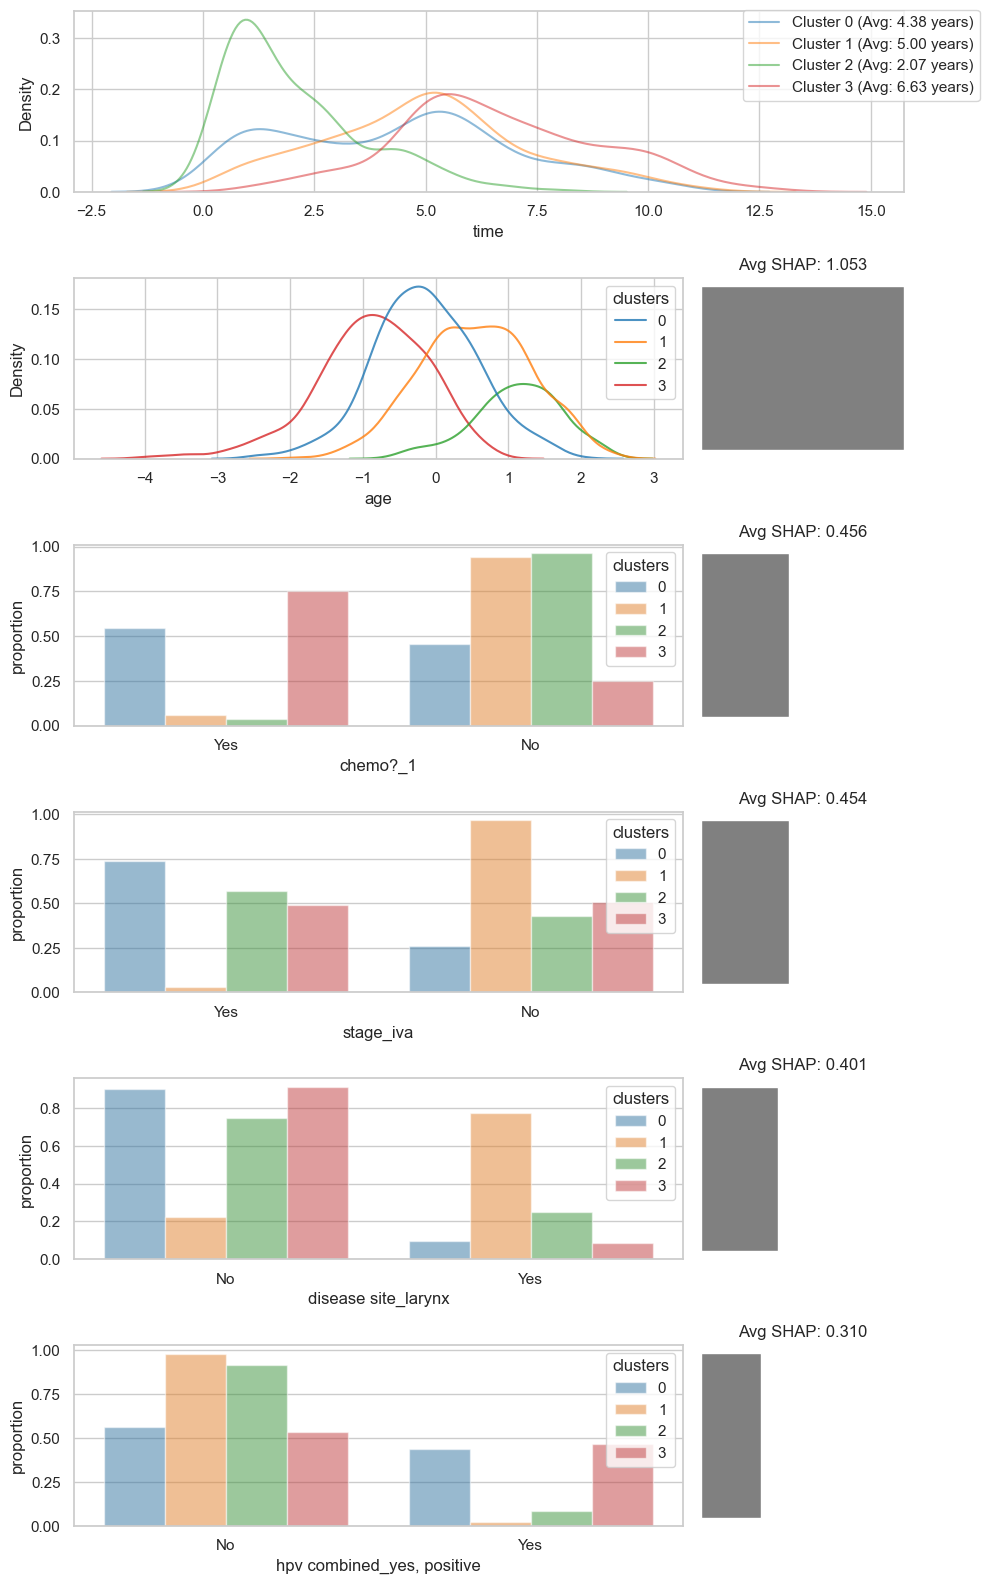

In [43]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import shap
import numpy as np

X = x.values
x1 = x.copy()
x1["clusters"] = clusters

# Initialization
explainer = shap.TreeExplainer(model)
shap_values = np.array(explainer.shap_values(X, check_additivity=False))
avg_shap = np.abs(shap_values).mean(axis=1).mean(axis=0)
feat_order = np.argsort(-avg_shap)

# Figure setup
fig = plt.figure(figsize=(10, 16))
gs = gridspec.GridSpec(6, 2, width_ratios=[3, 1], figure=fig)

# Define a consistent colormap
cmap = sns.color_palette("tab10")

# KDE plot for survival times
ax0 = plt.subplot(gs[0, :])
for i, cluster in enumerate(np.unique(clusters)):
    times = y[clusters == cluster].time
    sns.kdeplot(times, ax=ax0,  color=cmap[i], alpha=0.5, label=f'Cluster {cluster} (Avg: {times.mean():.2f} years)')
ax0.legend(loc='upper right', bbox_to_anchor=(1.1, 1.05))

# Feature distribution and SHAP values
for i, feat_idx in enumerate(feat_order[:5]):
    feat_name = x.columns[feat_idx]
    ax1 = fig.add_subplot(gs[i+1, 0])
    ax2 = fig.add_subplot(gs[i+1, 1])
    # Grouped bar chart for the frequency of each value in the categorical feature across clusters
    unique_clusters = np.unique(clusters)
    unique_values = np.unique(X[:, feat_idx])
    bar_width = 0.15  # Adjust as necessary based on the number of unique values

    # KDE plot for feature distributions
    # TODO: make y as the value frequency (counts)
    if feat_name == "age":
        sns.kdeplot(data=x1[x1['clusters'].isin(unique_clusters)], x="age", hue="clusters", ax=ax1, alpha=0.8, palette=cmap)
    else:
        # Calculate the proportion of each category value within each cluster
        category_proportions = x1.groupby('clusters')[feat_name].value_counts(normalize=True).rename('proportion').reset_index()
        category_proportions[feat_name] = category_proportions[feat_name].map({0: 'No', 1: 'Yes'})
        sns.barplot(data=category_proportions, x=feat_name, y='proportion', hue='clusters', ax=ax1, alpha=0.5, palette=cmap)
        # ax1.legend(title=feat_name)
    # ax1.set_ylabel(feat_name)

    # SHAP value bar plot
    avg_shap_per_cluster = np.abs(shap_values[:, :, feat_idx]).mean(axis=0).mean()
    ax2.barh(y=0, width=avg_shap_per_cluster, color='grey', height=0.1)
    ax2.set_xlim(0, max(avg_shap))
    ax2.axis('off')
    ax2.set_title(f'Avg SHAP: {avg_shap_per_cluster:.3f}')

plt.tight_layout()
plt.show()


In [29]:
shap.dependence_plot('age', shap_values=shap_values.values,
                     features=X, x_jitter=0.1, alpha=0.6)
shap.dependence_plot('chemo?_1', shap_values=shap_values.values,
                     features=X, x_jitter=0.1, alpha=0.6)
shap.dependence_plot('hpv combined_yes, positive',
                     shap_values=shap_values.values, features=X, x_jitter=0.1, alpha=0.6)
shap.dependence_plot('disease site_oropharynx',
                     shap_values=shap_values.values, features=X, x_jitter=0.1, alpha=0.6)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Assuming x is a DataFrame and c is a Series or a list
x1 = x.copy()
x1['cluster'] = c
display(x1)

,age,sex_male,disease site_hypopharynx,disease site_larynx,disease site_lip & oral cavity,disease site_nasal cavity,disease site_nasopharynx,disease site_oropharynx,disease site_paranasal sinus,disease site_salivary glands,...,stage_i,stage_ii,stage_iia,stage_iii,stage_iiia,stage_iiic,stage_iv,stage_iva,stage_ivb,cluster
0,0.397493,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0.541164,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-1.039212,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,3
3,2.239856,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,2
4,0.659480,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,0.532712,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1796,-0.684261,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1797,-0.312408,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,3
1798,-0.811029,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,3


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def plot_cluster_log_odds(data):
    # Create a figure with subplots - adjust the size and layout as necessary
    fig, axs = plt.subplots(nrows=data['cluster'].nunique(), ncols=1, figsize=(15, 25), sharex=True)

    # Sort clusters if they are not in numeric order
    clusters = sorted(data['cluster'].unique())
    
    for i, cluster in enumerate(clusters):
        # Filter data for the specific cluster
        cluster_data = data[data['cluster'] == cluster]

        # Create the bar plot
        sns.barplot(x='Log2(OR)', y='Description', data=cluster_data, ax=axs[i])
        
        # Annotate p-values or other statistics on the bars if needed
        for index, row in cluster_data.iterrows():
            axs[i].text(row['Log2(OR)'], index, f"p={row['p-value']:.1e}", 
                        color='black', ha="center", va="bottom")
        
        # Set the title for each subplot
        axs[i].set_title(f'Cluster {cluster}')
        
    # Set common labels
    plt.xlabel('Log2 Odds Ratio')
    plt.ylabel('Feature')
    
    # Adjust layout
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Example usage:
# Assuming you have a DataFrame 'df' with the required structure
# plot_cluster_log_odds(df)


                 1         0
chemo?_1  0.300234 -0.268967
chemo?_1 -0.173977  0.102143


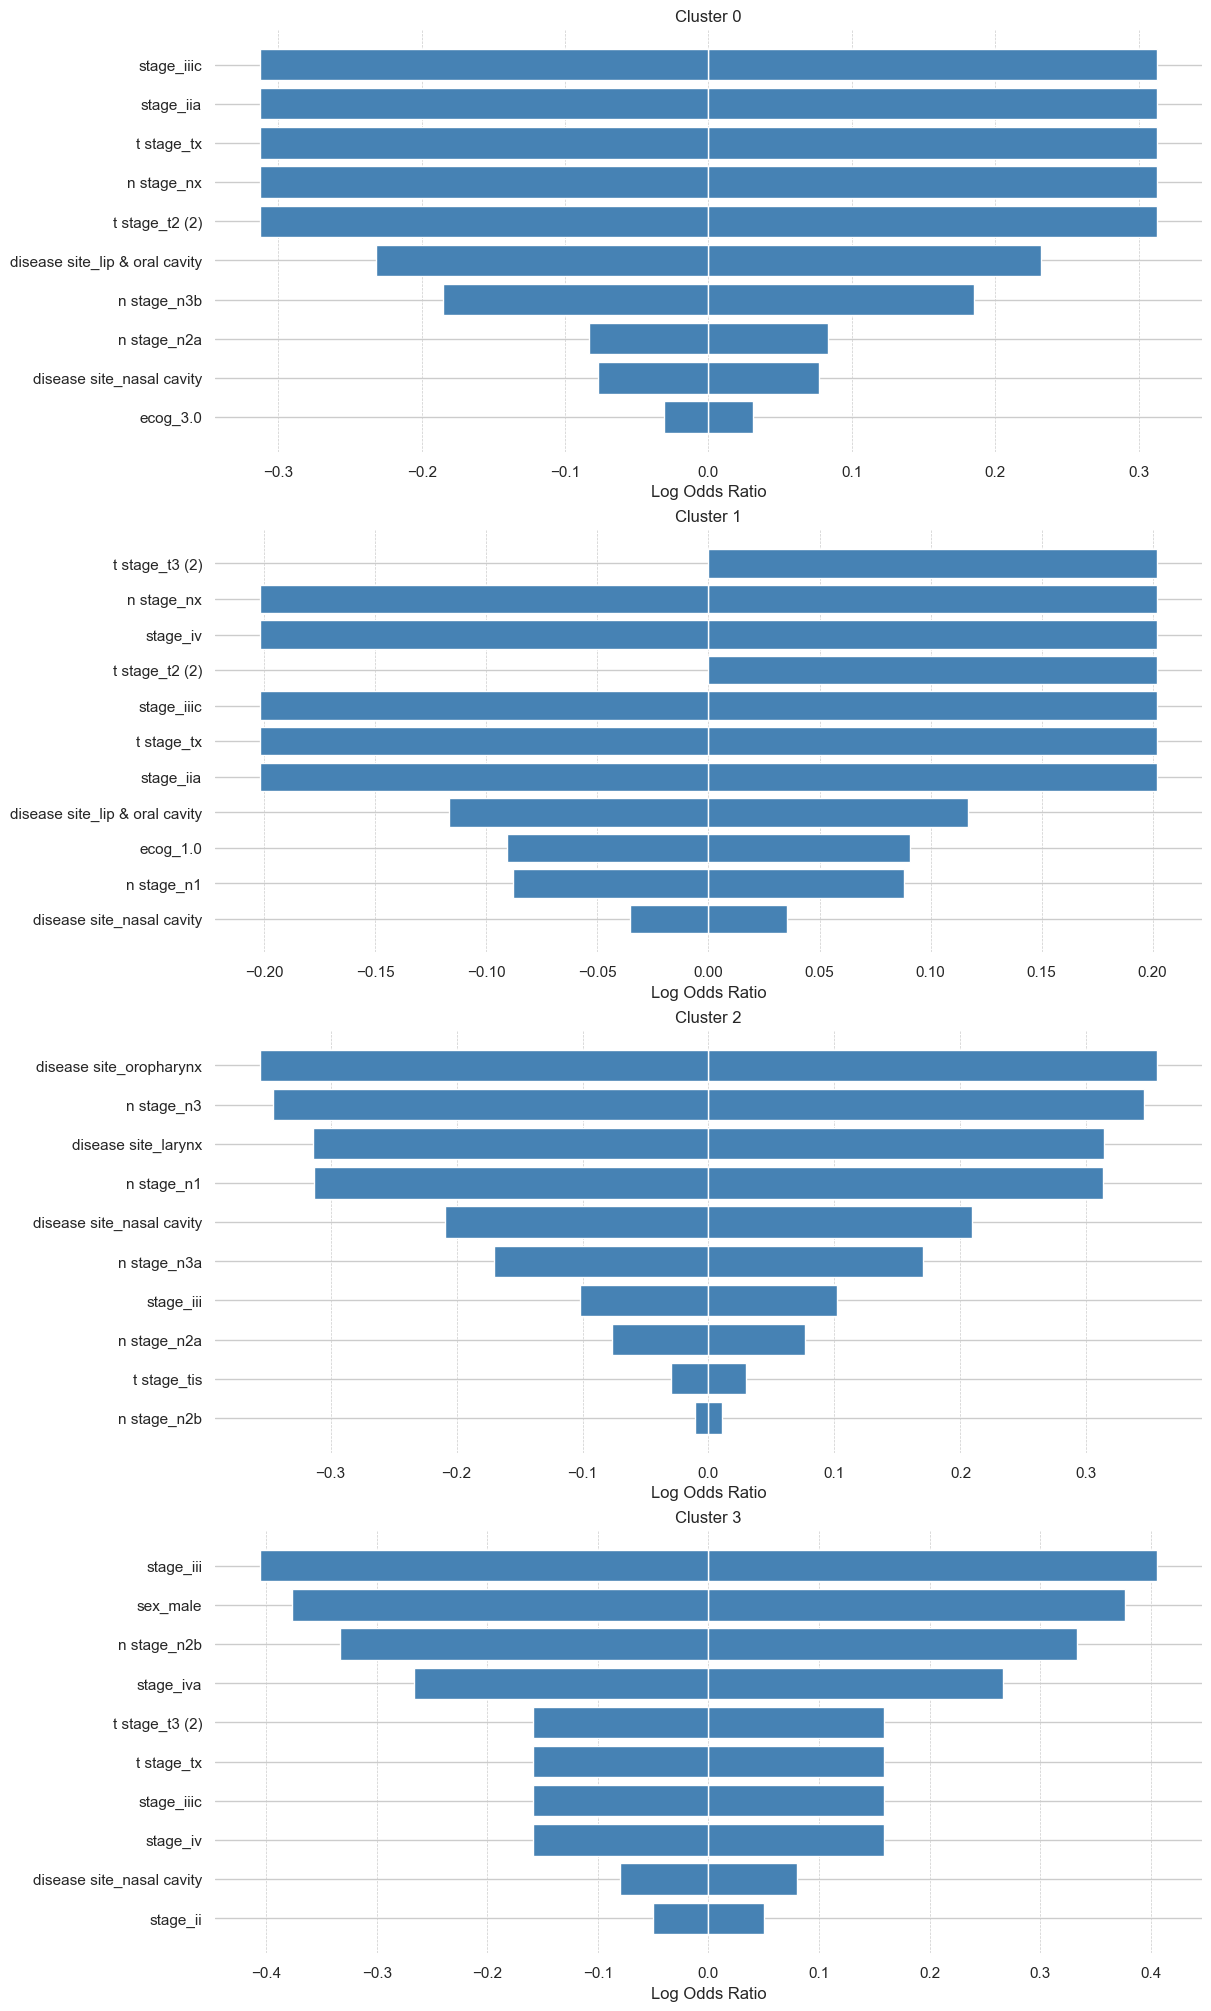

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

def calculate_log_odds_ratios(data, cluster_col, feature_cols):
    results = []
    clusters = data[cluster_col].unique()

    for cluster in clusters:
        cluster_data = data[data[cluster_col] == cluster]
        other_data = data[data[cluster_col] != cluster]

        for feature_col in feature_cols:
            for feature_value in data[feature_col].unique():
                # Contingency table
                obs_cluster = np.sum(cluster_data[feature_col] == feature_value)
                obs_not_cluster = np.sum(cluster_data[feature_col] != feature_value)
                exp_cluster = np.sum(other_data[feature_col] == feature_value)
                exp_not_cluster = np.sum(other_data[feature_col] != feature_value)
                table = np.array([[obs_cluster, obs_not_cluster], [exp_cluster, exp_not_cluster]])

                # Add 0.5 to all elements to avoid division by zero in log (Laplace smoothing)
                table = table + 0.5

                # Chi-squared test for independence
                chi2, p, dof, expected = chi2_contingency(table)

                # Correct calculation of Log Odds Ratio
                log_odds_ratio = np.log((table[0,0] * table[1,1]) / (table[0,1] * table[1,0]))
                results.append((cluster, feature_col, feature_value, log_odds_ratio, p))

    results_df = pd.DataFrame(results, columns=['cluster', 'feature', 'category', 'log_odds_ratio', 'p_value'])
    return results_df


def plot_log_odds_ratios(results_df, figsize=(12, 8), top_n=20):
    sns.set_style("whitegrid")
    clusters = sorted(results_df['cluster'].unique())
    n_clusters = len(clusters)
    
    # Calculate the total plot height, with each subplot having a fixed height
    subplot_height = 5
    total_height = n_clusters * subplot_height
    
    # Create a figure to hold the subplots
    fig, axes = plt.subplots(n_clusters, 1, figsize=(figsize[0], total_height), constrained_layout=True)
    
    if n_clusters == 1:  # If there's only one cluster, make axes a list
        axes = [axes]
    
    for ax, cluster in zip(axes, clusters):
        cluster_df = results_df[results_df['cluster'] == cluster]
        cluster_df = cluster_df.sort_values(by='log_odds_ratio', key=abs, ascending=True).head(top_n)
        
        # Plot the horizontal bar plot with a single color
        ax.barh(cluster_df['feature'], cluster_df['log_odds_ratio'], color='steelblue')
        
        # Set the title and labels
        ax.set_title(f'Cluster {cluster}')
        ax.set_xlabel('Log Odds Ratio')
        ax.set_ylabel('')
        
        # Optional: Set x-axis limits if you want to standardize across subplots
        # ax.set_xlim([min_value, max_value])

        # Remove all spines and set a grid
        sns.despine(ax=ax, left=True, bottom=True)
        ax.grid(True, which='major', axis='x', linestyle='--', linewidth=0.5, zorder=0)
    
    plt.show()


x_cat = x1.drop(columns="age")
# Assuming `data` is your DataFrame, `cluster_col` is the column name with cluster labels
# and `feature_cols` is the list of categorical feature columns you want to analyze
results_df = calculate_log_odds_ratios(x_cat, 'cluster', x_cat.drop(columns="cluster").columns)
plot_log_odds_ratios(results_df, figsize=(12, 8), top_n=20)

Th